In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/sample_data/risk_factors_cervical_cancer.csv')

In [ ]:
print(data.head())

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [ ]:
data.shape

(858, 36)

In [ ]:
# Clean up: replace '?' with NaN and convert to numeric
data.replace("?", np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Fill missing values
data.fillna(data.mean(), inplace=True)

In [ ]:
x = data.drop(columns=["Biopsy"])
y = data["Biopsy"]

x.shape


(858, 35)

In [ ]:
x.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,6.140845,5.816901,1,0,1,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
x = pd.get_dummies(x, columns = ["Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives",
    "Hormonal Contraceptives (years)",
    "IUD",
    "IUD (years)",
    "STDs",
    "STDs (number)",
    "STDs:condylomatosis",
    "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis",
    "STDs:pelvic inflammatory disease",
    "STDs:genital herpes",
    "STDs:molluscum contagiosum",
    "STDs:AIDS",
    "STDs:HIV",
    "STDs:Hepatitis B",
    "STDs:HPV",
    "STDs: Time since first diagnosis",
    "STDs: Time since last diagnosis"])

In [ ]:
x.shape

x.iloc[0]

,0
Age,18
STDs: Number of diagnosis,0
Dx:Cancer,0
Dx:CIN,0
Dx:HPV,0
...,...
STDs: Time since last diagnosis_16.0,False
STDs: Time since last diagnosis_18.0,False
STDs: Time since last diagnosis_19.0,False
STDs: Time since last diagnosis_21.0,False


In [ ]:
x.shape

(858, 306)

In [ ]:
print(y.iloc[0])

0


In [ ]:
y = pd.get_dummies(y)

In [ ]:
y.shape

(858, 2)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1693)

print(y_test[0:2])

        0      1
641  True  False
199  True  False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale X
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as pyplot
import datetime as dt
from datetime import datetime
import sklearn as sk
from sklearn.model_selection import train_test_split

In [ ]:
model = Sequential(name = 'CrashSeverity')

model.add(Dense(
    input_dim = 306,
    units = 10,
    activation = 'relu'
))

model.add(Dense(
    units = 8,
    activation = 'relu'
))

model.add(Dense(
    units = 2,
    activation = 'softmax'
))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CrashSeverity"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         3,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,176 (12.41 KB)

 Trainable params: 3,176 (12.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
print(x_train[0])
print(x_train.shape)

[-0.57432323 -0.29498402 -0.13898379 -0.09393364 -0.13343221 -0.1641527
 -0.19447746 -0.31240999 -0.24216105 -0.5694948   1.45539748 -0.17329175
 -0.55602186 -0.32626923 -0.21009529 -0.10862509 -0.09393364 -0.06627508
 -0.03820804 -0.03820804 -0.03820804 -0.03820804 -0.05407381 -0.05407381
 -0.09393364 -0.17329175 -0.32352726  2.07793875 -0.40581512 -0.08568631
 -0.47434165 -0.42032414 -0.2773501  -0.20241336 -0.15453348 -0.10153462
 -0.09393364 -0.08568631 -0.05407381 -0.09393364 -0.08568631 -0.06627508
 -0.07658396 -0.03820804 -0.14433757 -0.67334228  1.62161328 -0.26495813
 -0.44408071 -0.2981424  -0.20241336 -0.1641527  -0.09393364 -0.05407381
 -0.03820804 -0.03820804  0.43936713 -0.10862509 -0.42032414  0.43936713
  0.         -0.03820804 -0.10862509 -0.10862509 -0.13898379 -0.08568631
 -0.08568631 -0.08568631 -0.09393364 -0.05407381 -0.09393364 -0.09393364
 -0.10153462 -0.08568631 -0.07658396 -0.06627508 -0.06627508 -0.06627508
 -0.07658396 -0.09393364  0.         -0.06627508  0.

In [ ]:
print(y_train.iloc[0])
print(y_train.shape)

0     True
1    False
Name: 571, dtype: bool
(686, 2)


In [ ]:
estimate = model.fit(x_train, y_train, validation_split= 0.2, epochs = 200, verbose = 0)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9126 - loss: 0.5170 
Test Loss: 0.5711879134178162
Test Accuracy: 0.9127907156944275


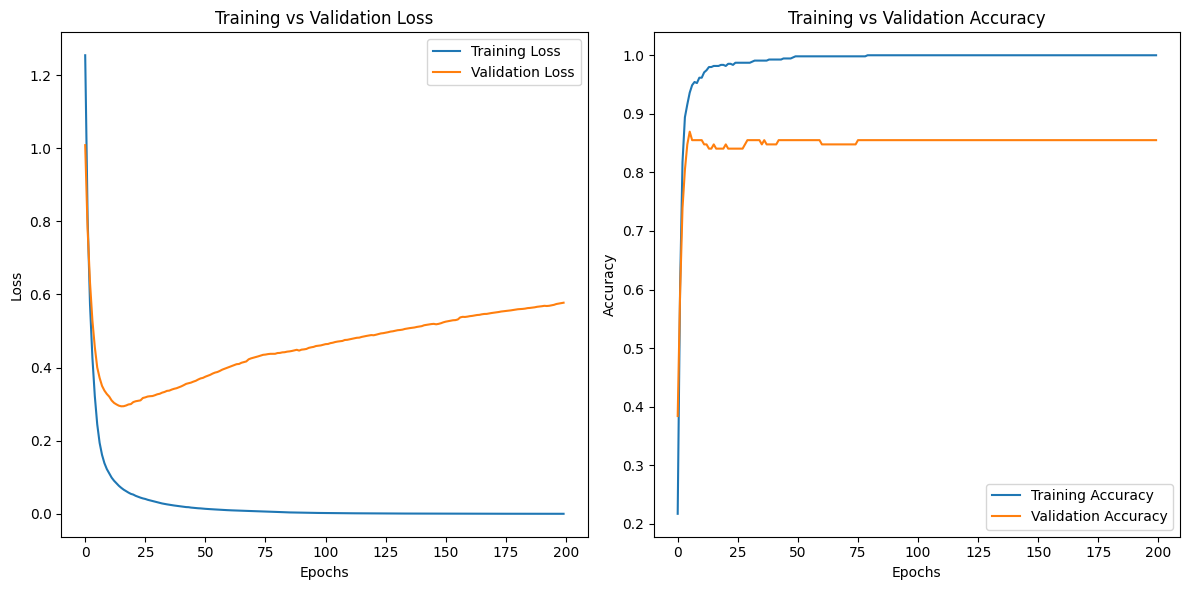

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the training history
history = estimate.history

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


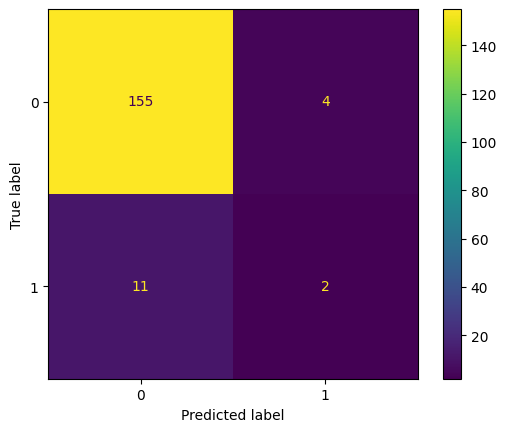

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.to_numpy().argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

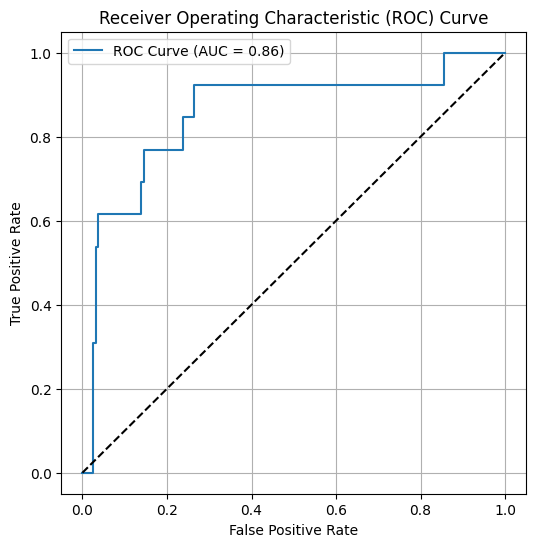

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Use probability for positive class
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


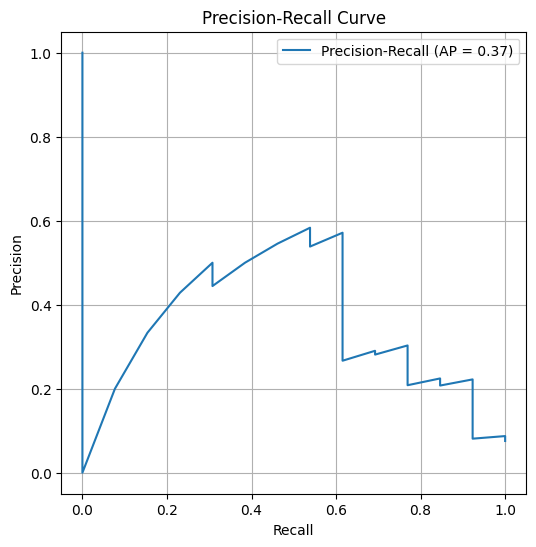

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_true, y_pred[:, 1])
avg_precision = average_precision_score(y_true, y_pred[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression

# Train a simple logistic regression model for interpretability
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, np.argmax(y_train.values, axis=1))

# Permutation importance
perm = PermutationImportance(lr_model, random_state=42).fit(x_test, y_true)
eli5.show_weights(perm, feature_names=x.columns.tolist())


Weight,Feature
0.0430 ± 0.0216,Schiller
0.0128 ± 0.0047,Hinselmann
0.0105 ± 0.0047,Hormonal Contraceptives (years)_6.0
0.0058 ± 0.0195,Number of sexual partners_1.0
0.0047 ± 0.0087,Num of pregnancies_2.275561097256858
0.0047 ± 0.0047,First sexual intercourse_17.0
0.0035 ± 0.0057,Hormonal Contraceptives (years)_2.0
0.0023 ± 0.0057,Smokes_0.1455621301775148
0.0023 ± 0.0057,Smokes (packs/year)_0.4531439506492308
0.0023 ± 0.0057,Number of sexual partners_2.0


In [ ]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.6 MB/s eta 0:00:00


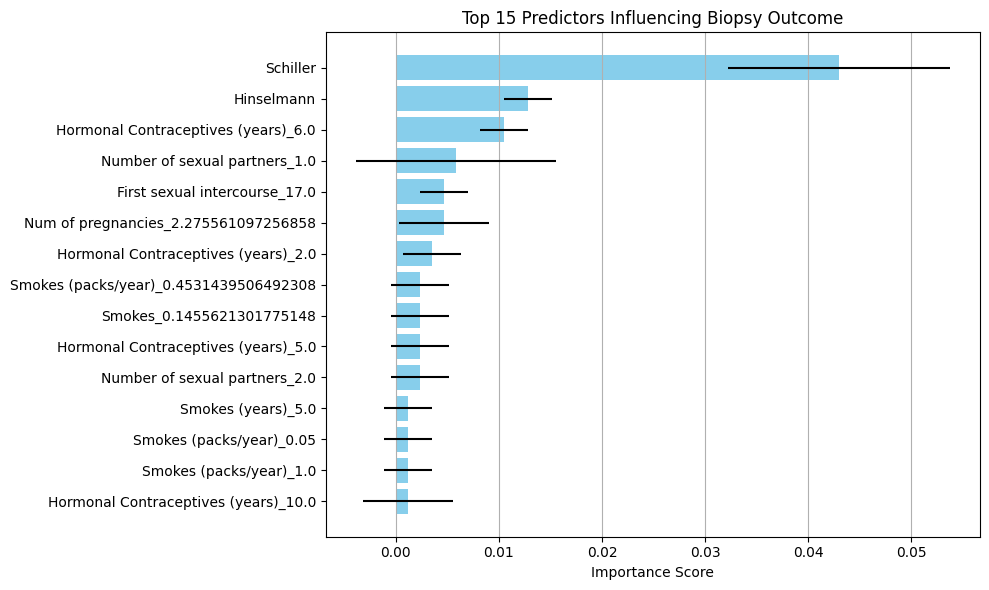

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature names (make sure this is the same order as used in x_train/x_test)
feature_names = x.columns.tolist()

# Extract weights and standard deviation from permutation importance
importances = perm.feature_importances_
std = perm.feature_importances_std_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Std': std
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 15 Predictors Influencing Biopsy Outcome')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the data
df = pd.read_csv("/content/sample_data/risk_factors_cervical_cancer.csv")

# Replace '?' with NaN and convert to numeric
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Split into features and target
X = df.drop(columns=["Biopsy"])
y = df["Biopsy"]

# Fill missing values (using mean, you could try median or KNN imputation too)
X.fillna(X.mean(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7970 - loss: 0.5584 - val_accuracy: 0.9420 - val_loss: 0.2530
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9295 - loss: 0.2478 - val_accuracy: 0.9275 - val_loss: 0.1493
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9577 - loss: 0.1290 - val_accuracy: 0.9275 - val_loss: 0.1462
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9553 - loss: 0.1068 - val_accuracy: 0.9275 - val_loss: 0.1433
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.0738 - val_accuracy: 0.9275 - val_loss: 0.1432
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0504 - val_accuracy: 0.9275 - val_loss: 0.1338
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9712 - loss: 0.0787 - val_accuracy: 0.9130 - val_loss: 0.1322
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0626 - val_accuracy: 0.9130 - val_loss: